<a href="https://colab.research.google.com/github/rodrigoromanguzman/Actividades_Aprendizaje-/blob/main/A2b_DL_TC5033_AD2023_group_35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

<ul>
<li>Alfonso Garibay Flores - A01224167 </li>
<li>María Nelly Porras Alcantar - A01793828 </li>
<li>Rodrigo Ildefonso Roman Guzmán - A01794225 </li>
<li>Rodia Zuriel Tejeda Moreno - A01260437</li>
</ul>

<h3>We import the libraries that will be needed for the activity.</3>





In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
#only if you have jupyterthemes
# from jupyterthemes import jtplot
# jtplot.style()

### Download Cifar10 dataset

We are going to use PyTorch's DataLoader to manage the dataset
#Context of the dataset:
CIFAR stands for the Canadian Institute For Advanced Research (CIFAR), where it was created.
CIFAR-10 is commonly used as a benchmark dataset for developing and testing machine learning models, particularly in the field of image classification. Researchers and practitioners use CIFAR-10 to evaluate the performance of various algorithms and approaches.

<h3>We check if gpu is available for faster training of our model</h3>

In [ ]:
torch.cuda.is_available()

True

<h3>The data sets are imported from torchvision.datasets and we also transform them to DataLoader objects. This allows us to create minibatches and be able to iterate and work with the data</h3>

In [ ]:
DATA_PATH = './data'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


<h3>The dataset is split into a training set of 50,000 images and a test set of 10,000 images.</3>


In [ ]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [ ]:
cifar10_test

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

<h3>We can see how the DataLoader object is divided in regard to its minibatches</h3>

In [ ]:
train_loader.batch_size

64

In [ ]:
for i, (x, y) in enumerate(train_loader):
    print(x, y)

Se han truncado las últimas 5000 líneas del flujo de salida.
          [ 3.6191e-01,  4.5717e-01,  4.4130e-01,  ..., -5.0885e-02,
           -3.5008e-02,  6.0253e-02],
          ...,
          [-9.8516e-02, -1.3027e-01, -8.2639e-02,  ...,  1.0788e-01,
            3.6191e-01,  7.1120e-01],
          [ 2.5077e-01,  1.8727e-01,  6.0253e-02,  ...,  3.7779e-01,
            3.7779e-01,  4.0954e-01],
          [ 5.6831e-01,  4.8893e-01,  3.6191e-01,  ...,  2.3490e-01,
            3.7779e-01,  1.7139e-01]],

         [[ 7.9222e-01,  4.0491e-01,  2.4352e-01,  ...,  1.0343e+00,
            1.6283e-01,  4.8560e-01],
          [ 6.7925e-01,  5.3401e-01,  6.4698e-01,  ...,  6.4698e-01,
            1.3056e-01,  3.8877e-01],
          [ 6.4698e-01,  7.9222e-01,  8.0836e-01,  ..., -4.6962e-02,
           -7.9238e-02, -1.4686e-02],
          ...,
          [-7.9238e-02, -9.5376e-02, -4.6962e-02,  ...,  1.4670e-01,
            3.8877e-01,  7.1153e-01],
          [ 2.7580e-01,  2.1125e-01,  9.8281e-02,  

#INFORMATION ABOUT THE DATASET
CIFAR-10 consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The classes are:
Airplane
Automobile
Bird
Cat
Deer
Dog
Frog
Horse
Ship
Truck

### Using  GPUs

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


### Mostrar imágenes

La imagen muestreada representa un: airplane


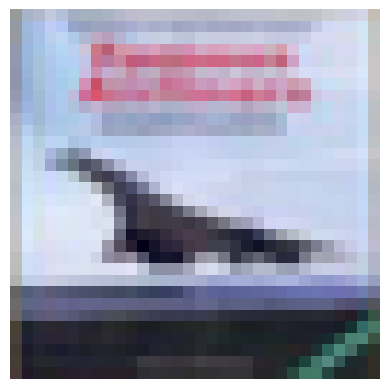

In [ ]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


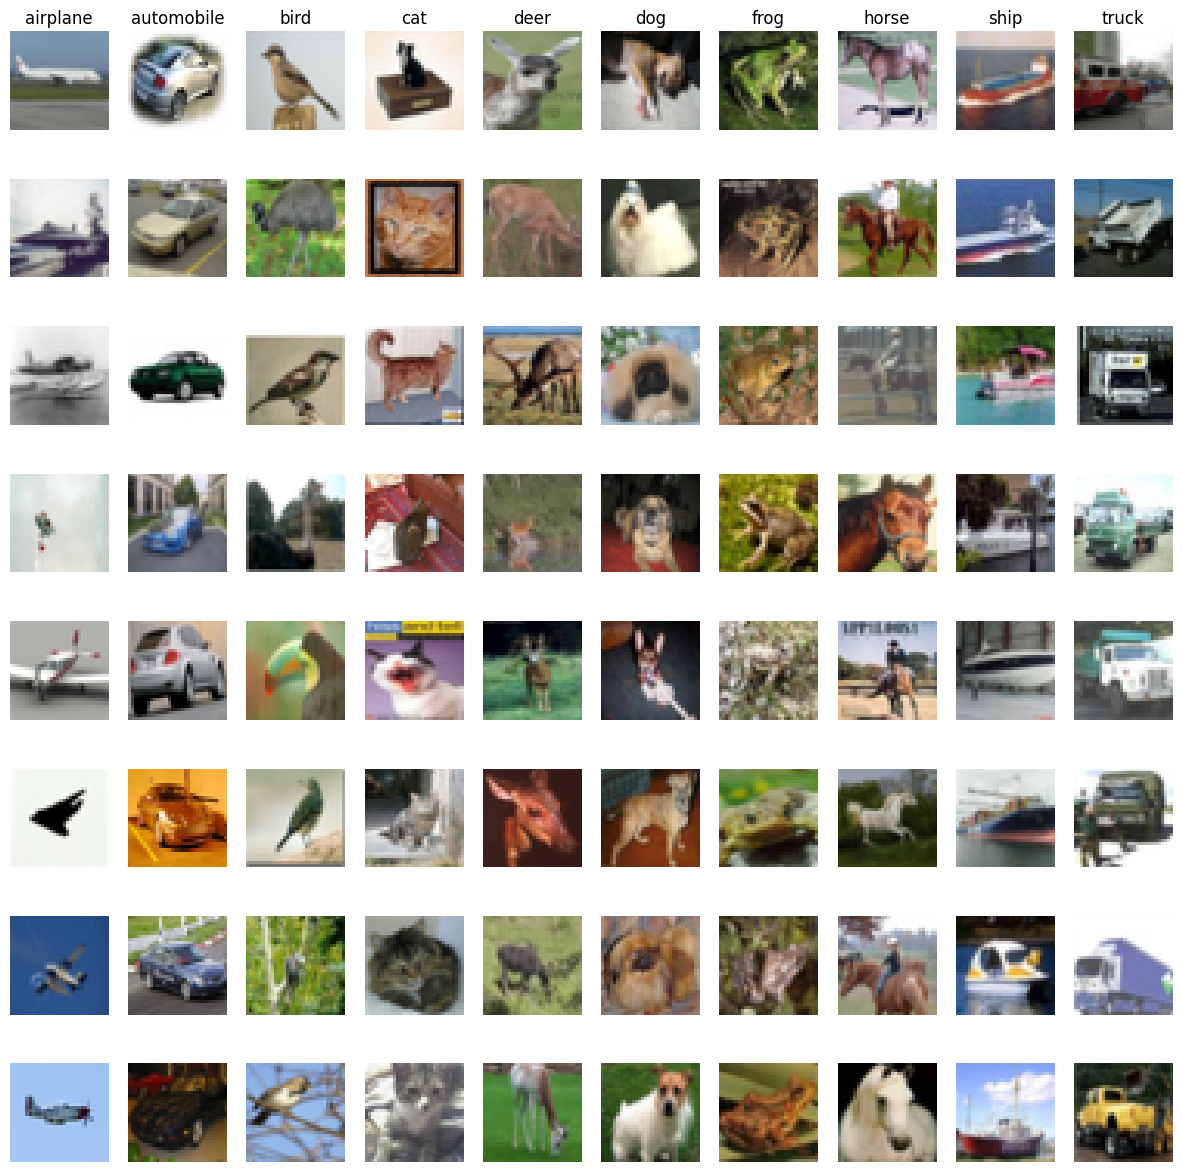

In [ ]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### Calcular accuracy


<h3>The accuracy function receives the model we are working with and the DataLoader object that we want to test. We have to set the dmodel to evaluation mode and also place it in memory</h3>

In [ ]:
def accuracy(model, loader):
  correct = 0
  total = 0
  #Set the model to eval mode
  #We dont need gradients nor other properties from train
  model.eval()
  model = model.to(device = device)
  #We wont compute gradients
  with torch.no_grad():
    for (xi, yi) in loader:
      #Pass data to GPU
      xi = xi.to(device = device, dtype = torch.float32)
      yi = yi.to(device = device,dtype = torch.long)
      scores = model(xi)
      _,y_hat = scores.max(dim=1) #value max, index max -  y_hat shape = (mb_size)
      correct += (y_hat == yi.squeeze()).sum() #y_shape shape (mb_size) , yi shape(mb_size,1)
      total += y_hat.size(0)
    return float(correct)/total

### Loop de entrenamiento

In [ ]:
def train(model, optimiser, epochs=100):
  model = model.to(device = device)
  for epoch in range(epochs):
    for batch_idx, (xi, yi) in enumerate(train_loader):
      model.train() #Training
      #Pass data to GPU
      xi = xi.to(device=device,dtype = torch.float32)
      yi = yi.to(device=device,dtype = torch.long)

      scores = model(xi)
      cost = (F.cross_entropy(scores,yi))

      #Delete the gradients
      optimiser.zero_grad()
      #Update the gradient
      cost.backward()
      #Update the parametrers w and b
      #According to the optimizer
      optimiser.step()

    acc = accuracy(model,val_loader)
    print(f'Epoch: {epoch}, cost: {cost.item()}, accuracy: {acc}')



### Linear model

Base case

<h3>We start by creating a linear model which makes use of a single hidden layer of 256 neurons. This will be a reference to check wether our CNN model is able to outcome this result</h3>

In [ ]:
# Use PyTorch to create a linear model to have an initial baseline model
hidden1 = 256
hidden = 256
lr = 1e-3
epochs = 10

model1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features = 32*32*3, out_features = hidden1),nn.ReLU(),
    nn.Linear(in_features = hidden1, out_features = hidden),nn.ReLU(),
    nn.Linear(in_features = hidden, out_features = 10),nn.ReLU(),
)
optimiser = torch.optim.Adam(model1.parameters(), lr=lr)

In [ ]:
train(model1, optimiser, epochs)

Epoch: 0, cost: 1.3626384735107422, accuracy: 0.4516
Epoch: 1, cost: 1.3995023965835571, accuracy: 0.4966
Epoch: 2, cost: 1.702035665512085, accuracy: 0.5066
Epoch: 3, cost: 1.3153972625732422, accuracy: 0.5244
Epoch: 4, cost: 0.9793336391448975, accuracy: 0.5248
Epoch: 5, cost: 0.6722455620765686, accuracy: 0.5248
Epoch: 6, cost: 0.9838578104972839, accuracy: 0.5192
Epoch: 7, cost: 1.2386668920516968, accuracy: 0.5292
Epoch: 8, cost: 1.116520881652832, accuracy: 0.5266
Epoch: 9, cost: 0.6597644090652466, accuracy: 0.5312


In [ ]:
accuracy(model1,test_loader)

0.5168

### Sequential CNN

<h3>Now we create our convolutional neural network.The model is relatively simple and suits the basic image classification tasks.It consist of two convolutional layers followed by a max-pooling operation </h3>

In [ ]:
# Use PyTorch to implement a CNN model, accuracy should be better than
#the linear model

CHANNEL1 = 16
CHANNEL2 = 52
epochs = 20
lr = 1e-4
modelCNN1 = nn.Sequential(
    nn.Conv2d(in_channels = 3,out_channels = CHANNEL1,kernel_size = (3,3),padding = 1),
    nn.ReLU(),
    nn.Conv2d(in_channels = CHANNEL1,out_channels = CHANNEL2,kernel_size = (3,3),padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Flatten(),
    #Linear layer
    nn.Linear(in_features = 16*16*CHANNEL2,out_features = 10),
)


optimiser = torch.optim.Adam(modelCNN1.parameters(), lr=lr)

Evaluation of model on the test set

In [ ]:
train(modelCNN1,optimiser, epochs)

Epoch: 0, cost: 1.4777380228042603, accuracy: 0.4916
Epoch: 1, cost: 1.2901028394699097, accuracy: 0.5416
Epoch: 2, cost: 1.7133265733718872, accuracy: 0.5656
Epoch: 3, cost: 1.3913538455963135, accuracy: 0.5744
Epoch: 4, cost: 1.3214210271835327, accuracy: 0.6002
Epoch: 5, cost: 0.7858598232269287, accuracy: 0.6184
Epoch: 6, cost: 1.3908483982086182, accuracy: 0.614
Epoch: 7, cost: 1.1636070013046265, accuracy: 0.6268
Epoch: 8, cost: 0.6601365208625793, accuracy: 0.6364
Epoch: 9, cost: 0.713087797164917, accuracy: 0.6494
Epoch: 10, cost: 1.2948198318481445, accuracy: 0.6436
Epoch: 11, cost: 1.1846508979797363, accuracy: 0.656
Epoch: 12, cost: 0.9488980174064636, accuracy: 0.6578
Epoch: 13, cost: 0.7542824745178223, accuracy: 0.6674
Epoch: 14, cost: 0.9256687164306641, accuracy: 0.6638
Epoch: 15, cost: 0.868391752243042, accuracy: 0.6682
Epoch: 16, cost: 0.849469006061554, accuracy: 0.6688
Epoch: 17, cost: 0.5299596786499023, accuracy: 0.67
Epoch: 18, cost: 0.6217751502990723, accuracy

In [ ]:
accuracy(modelCNN1,test_loader)

0.6596

<h1>Conclusions</h1>
<h2><b>Model Performance Analysis:</b></h2>

Despite the relative simplicity of our convolutional neural network (CNN) model, its performance has proven to be notably superior to that of the linear model. When benchmarked against the linear model, which struggled to surpass an accuracy of 55%, the CNN showcased its strength in handling image classification tasks. It's worth noting that an accuracy of 55% for the linear model isn't bad, especially given that we're dealing with a 10-class classification problem. A completely uninformed model, making random guesses, would be expected to achieve an accuracy close to 10%. However, the CNN model's ability to swiftly outpace the linear model, reaching an accuracy of 66%, underscores the advantages of leveraging spatial hierarchies and patterns inherent in image data.

<h2><b>Challenges and Solutions:</b></h2>

A significant challenge we encountered during the training phase was the model's declining performance after a certain number of iterations. This regression in accuracy is indicative of overfitting, where the model becomes exceedingly tailored to the training data, compromising its ability to generalize to unseen data. Recognizing this, it became imperative for us to explore strategies to enhance the model's generalization capabilities. Implementing techniques such as dropout, and finding a balance between learning rate and number of epochs were solutions to mitigate overfitting and ensure a more robust model performance on diverse datasets.
